In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
import random
import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df.head(11)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


## Preprocessing Data (missing values)

In [6]:
# Merubah kolom yg berisi null dan undefined menjadi NaN value

for i in df.columns:
    if df[i].dtype == 'object' and i != 'country':
        df.loc[df[i].str.contains('NULL'), i] = np.nan
        df.loc[df[i].str.contains('Undefined', na = False), i] = np.nan

In [7]:
null_data = df.isnull().sum()
null_data[null_data > 0]

children                     4
meal                      1169
country                    488
market_segment               2
distribution_channel         5
agent                    16340
company                 112593
dtype: int64

In [8]:
# Hapus row dengan NaN value di kolom yg memiliki NaN value sedikit

drop_columns = ['country', 'children', 'market_segment', 'distribution_channel']
df_drop = df.dropna(subset = drop_columns)

In [9]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118897 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             118897 non-null object
is_canceled                       118897 non-null int64
lead_time                         118897 non-null int64
arrival_date_year                 118897 non-null int64
arrival_date_month                118897 non-null object
arrival_date_week_number          118897 non-null int64
arrival_date_day_of_month         118897 non-null int64
stays_in_weekend_nights           118897 non-null int64
stays_in_week_nights              118897 non-null int64
adults                            118897 non-null int64
children                          118897 non-null float64
babies                            118897 non-null int64
meal                              117732 non-null object
country                           118897 non-null object
market_segment                    118897 non-null object
distribution_channel              118897 n

In [10]:
# Sumber informasi : https://www.sciencedirect.com/science/article/pii/S2352340918315191#bib1

# Terdapat Nan value pada kolom agent dan company , value dari kedua kolom tersebut ialah ID dari agent dan company
# dimana NaN tersebut mengindikasikan pemesanan (booking) hotel tidak melalui agent melainkan pembelian secara langsung
# dengan begitu NaN value akan diisi dengan random yaitu 0

df_drop.loc[df_drop['agent'].isnull(), 'agent'] = 0 
df_drop.loc[df_drop['company'].isnull(), 'company'] = 0

In [11]:
# Untuk kolom meal ada 4 kategori, yaitu :
# Undefined/SC – no meal package;
# BB – Bed & Breakfast;
# HB – Half board (breakfast and one other meal);
# FB – Full board (breakfast, lunch and dinner)
# karena undifined sudah di fill dengan NaN dan undifined sama dengan SC, maka NaN dapat diisi dengan SC 

df_drop['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', nan], dtype=object)

In [12]:
# merubah nan menjadi SC

df_drop.loc[df_drop['meal'].isnull(), 'meal'] = 'SC'
df_drop['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [13]:
df_drop.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,118897.0,0.371355,0.483169,0.00,0.0,0.0,1.0,1.0
lead_time,118897.0,104.311446,106.903759,0.00,18.0,69.0,161.0,737.0
arrival_date_year,118897.0,2016.157666,0.707454,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,118897.0,27.166548,13.590028,1.00,16.0,28.0,38.0,53.0
arrival_date_day_of_month,118897.0,15.800971,8.780305,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,118897.0,0.928888,0.996215,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,118897.0,2.502141,1.900175,0.00,1.0,2.0,3.0,41.0
adults,118897.0,1.858390,0.578578,0.00,2.0,2.0,2.0,55.0
children,118897.0,0.104199,0.399166,0.00,0.0,0.0,0.0,10.0
babies,118897.0,0.007948,0.097381,0.00,0.0,0.0,0.0,10.0


In [14]:
# dilihat dari tabel diatas, ada value yang janggal pada kolom adr dengan value minus

df_drop[df_drop['adr'] < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,No Deposit,273.0,0.0,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [15]:
df_drop = df_drop[df_drop['adr'] > 0]

In [16]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116958 entries, 2 to 119389
Data columns (total 32 columns):
hotel                             116958 non-null object
is_canceled                       116958 non-null int64
lead_time                         116958 non-null int64
arrival_date_year                 116958 non-null int64
arrival_date_month                116958 non-null object
arrival_date_week_number          116958 non-null int64
arrival_date_day_of_month         116958 non-null int64
stays_in_weekend_nights           116958 non-null int64
stays_in_week_nights              116958 non-null int64
adults                            116958 non-null int64
children                          116958 non-null float64
babies                            116958 non-null int64
meal                              116958 non-null object
country                           116958 non-null object
market_segment                    116958 non-null object
distribution_channel              116958 n

In [17]:
df_drop.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,116958.0,0.375776,0.484325,0.00,0.0,0.0,1.0,1.0
lead_time,116958.0,105.376297,106.944554,0.00,19.0,71.0,162.0,709.0
arrival_date_year,116958.0,2016.161451,0.706501,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,116958.0,27.137981,13.561225,1.00,16.0,27.0,38.0,53.0
arrival_date_day_of_month,116958.0,15.805221,8.783034,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,116958.0,0.937670,0.993328,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,116958.0,2.522957,1.885579,0.00,1.0,2.0,3.0,41.0
adults,116958.0,1.862438,0.481129,0.00,2.0,2.0,2.0,4.0
children,116958.0,0.104815,0.400288,0.00,0.0,0.0,0.0,10.0
babies,116958.0,0.007866,0.097102,0.00,0.0,0.0,0.0,10.0


In [18]:
clean_data = df_drop
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,0.0,0.0,0,Transient,107.0,0,0,Check-Out,2015-07-03


In [19]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116958 entries, 2 to 119389
Data columns (total 32 columns):
hotel                             116958 non-null object
is_canceled                       116958 non-null int64
lead_time                         116958 non-null int64
arrival_date_year                 116958 non-null int64
arrival_date_month                116958 non-null object
arrival_date_week_number          116958 non-null int64
arrival_date_day_of_month         116958 non-null int64
stays_in_weekend_nights           116958 non-null int64
stays_in_week_nights              116958 non-null int64
adults                            116958 non-null int64
children                          116958 non-null float64
babies                            116958 non-null int64
meal                              116958 non-null object
country                           116958 non-null object
market_segment                    116958 non-null object
distribution_channel              116958 n

## Outliers 

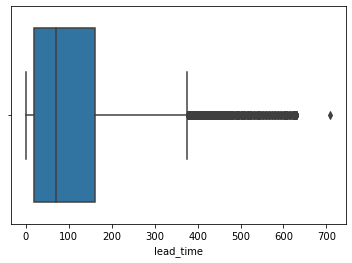

In [20]:
sns.boxplot(x = 'lead_time', data = clean_data)

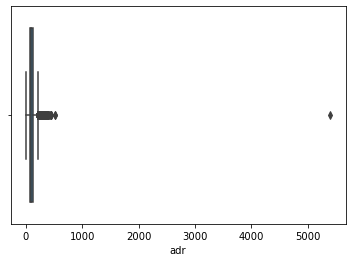

In [21]:
sns.boxplot(x = 'adr', data = clean_data)

In [22]:
# dalam kolom adr terdapat 1 outlier yg melebihi nilai di atas 1000
# dengan begitu outlier dihilangkan

clean_data = clean_data[clean_data['adr'] < 1000]

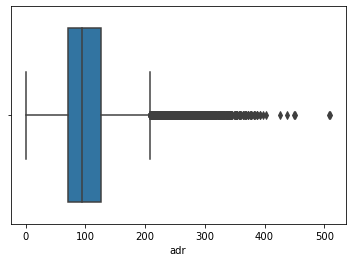

In [23]:
sns.boxplot(x = 'adr', data = clean_data)

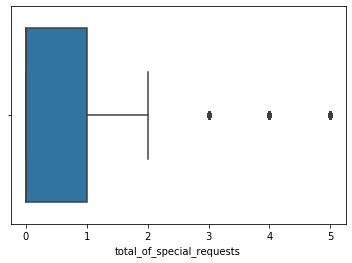

In [24]:
sns.boxplot(x = 'total_of_special_requests', data = clean_data)

## Label Encoder

In [25]:
df_LE = clean_data.copy()
df_LE

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,0.0,0.0,0,Transient,107.00,0,0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [26]:
l_encoder = LabelEncoder()

cat = [
    'hotel',
    'arrival_date_month',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'customer_type',
    'reservation_status',
    'reservation_status_date'
    ]

for col in cat:
    df_LE[col] = l_encoder.fit_transform(df_LE[col])

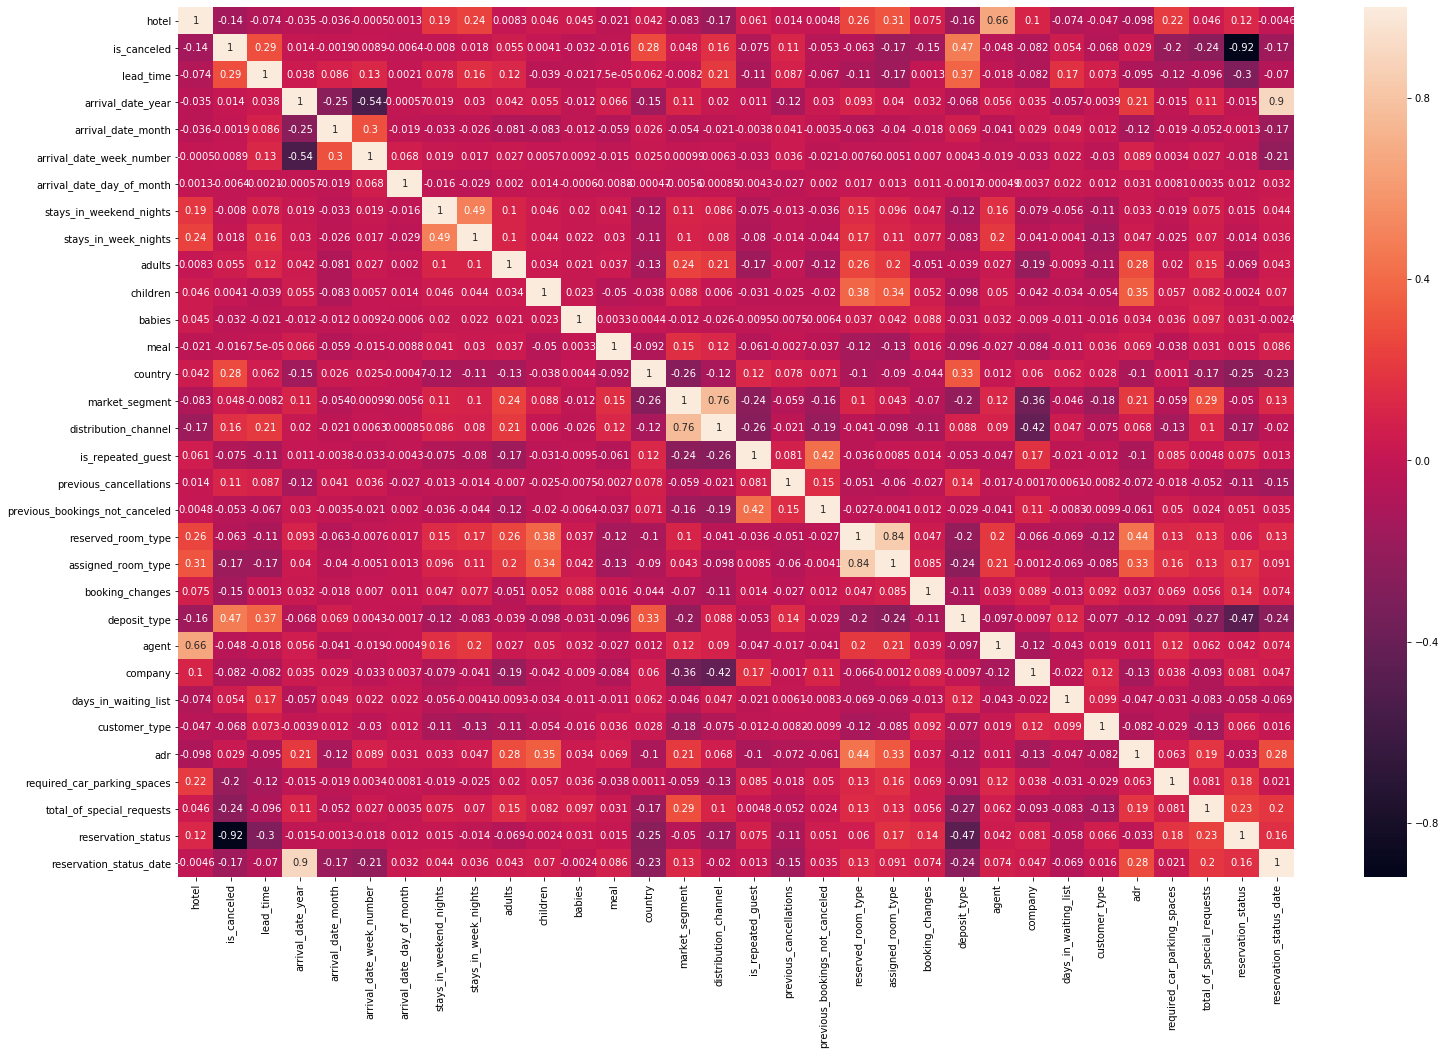

In [27]:
plt.figure(figsize = (25,16))
sns.heatmap(df_LE.corr(), annot = True)

In [28]:
df_LE.corr()['is_canceled'].abs().sort_values(ascending=False)[1:]

reservation_status                0.918068
deposit_type                      0.468327
lead_time                         0.289268
country                           0.278919
total_of_special_requests         0.238312
required_car_parking_spaces       0.196780
assigned_room_type                0.171640
reservation_status_date           0.166331
distribution_channel              0.162884
booking_changes                   0.145152
hotel                             0.135154
previous_cancellations            0.110448
company                           0.082120
is_repeated_guest                 0.074936
customer_type                     0.068161
reserved_room_type                0.062704
adults                            0.054554
days_in_waiting_list              0.053939
previous_bookings_not_canceled    0.052883
agent                             0.048290
market_segment                    0.048039
babies                            0.032491
adr                               0.029168
stays_in_we

In [29]:
# drop kolom reservation_status karena memiliki korelasi yang tinggi
# drop pula kolom reservation_status_date karena berhubungan dengan kolom reservation_status

df_LE_clean = df_LE.drop(['reservation_status', 'reservation_status_date'], axis = 1)
df_LE_clean = df_LE_clean.reset_index(drop = True)

In [30]:
df_LE_clean

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,0,7,2015,5,27,1,0,1,1,...,2,0,0,0.0,0.0,0,2,75.00,0,0
1,1,0,13,2015,5,27,1,0,1,1,...,0,0,0,304.0,0.0,0,2,75.00,0,0
2,1,0,14,2015,5,27,1,0,2,2,...,0,0,0,240.0,0.0,0,2,98.00,0,1
3,1,0,14,2015,5,27,1,0,2,2,...,0,0,0,240.0,0.0,0,2,98.00,0,1
4,1,0,0,2015,5,27,1,0,2,2,...,2,0,0,0.0,0.0,0,2,107.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116952,0,0,23,2017,1,35,30,2,5,2,...,0,0,0,394.0,0.0,0,2,96.14,0,0
116953,0,0,102,2017,1,35,31,2,5,3,...,4,0,0,9.0,0.0,0,2,225.43,0,2
116954,0,0,34,2017,1,35,31,2,5,2,...,3,0,0,9.0,0.0,0,2,157.71,0,4
116955,0,0,109,2017,1,35,31,2,5,2,...,0,0,0,89.0,0.0,0,2,104.40,0,0


## Data Scaling

In [31]:
clean_data_scal = df_LE_clean.drop('is_canceled', axis = 1)

robust = RobustScaler()
robust.fit(clean_data_scal)
scaled_df = robust.transform(clean_data_scal)
scaled_df = pd.DataFrame(scaled_df, columns = clean_data_scal.columns)
scaled_df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1.0,-0.447552,-1.0,-0.166667,0.0,-1.0,-0.5,-0.5,-1.0,0.0,...,0.666667,0.0,0.0,-0.061224,0.0,0.0,0.0,-0.363636,0.0,0.0
1,1.0,-0.405594,-1.0,-0.166667,0.0,-1.0,-0.5,-0.5,-1.0,0.0,...,0.000000,0.0,0.0,2.006803,0.0,0.0,0.0,-0.363636,0.0,0.0
2,1.0,-0.398601,-1.0,-0.166667,0.0,-1.0,-0.5,0.0,0.0,0.0,...,0.000000,0.0,0.0,1.571429,0.0,0.0,0.0,0.054545,0.0,1.0
3,1.0,-0.398601,-1.0,-0.166667,0.0,-1.0,-0.5,0.0,0.0,0.0,...,0.000000,0.0,0.0,1.571429,0.0,0.0,0.0,0.054545,0.0,1.0
4,1.0,-0.496503,-1.0,-0.166667,0.0,-1.0,-0.5,0.0,0.0,0.0,...,0.666667,0.0,0.0,-0.061224,0.0,0.0,0.0,0.218182,0.0,0.0


In [32]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116957 entries, 0 to 116956
Data columns (total 29 columns):
hotel                             116957 non-null float64
lead_time                         116957 non-null float64
arrival_date_year                 116957 non-null float64
arrival_date_month                116957 non-null float64
arrival_date_week_number          116957 non-null float64
arrival_date_day_of_month         116957 non-null float64
stays_in_weekend_nights           116957 non-null float64
stays_in_week_nights              116957 non-null float64
adults                            116957 non-null float64
children                          116957 non-null float64
babies                            116957 non-null float64
meal                              116957 non-null float64
country                           116957 non-null float64
market_segment                    116957 non-null float64
distribution_channel              116957 non-null float64
is_repeated_guest  

In [33]:
scaled_df['is_canceled'] = df_LE_clean['is_canceled']

In [34]:
scaled_df.isna().sum()

hotel                             0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

## Export file

In [35]:
scaled_df.to_csv('cln_hotel_bookings.csv')
clean_data.to_csv('clean_data.csv')

In [37]:
joblib.dump(robust, "RobScalerHotel")

['RobScalerHotel']

#### Cek value fitur Untuk Web App

##### Country

In [54]:
clean_data['country']

2         GBR
3         GBR
4         GBR
5         GBR
6         PRT
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 116957, dtype: object

In [74]:
df_LE['country']

2          59
3          59
4          59
5          59
6         135
         ... 
119385     15
119386     56
119387     43
119388     59
119389     43
Name: country, Length: 116957, dtype: int32

In [75]:
country_ori = clean_data['country'] 
country_LE = df_LE['country'] 
  
ori_series = pd.Series(country_ori) 
LE_series = pd.Series(country_LE) 
  
frames = { 'Country Ori': ori_series, 'Country Label Encoder': LE_series } 
  
country_df = pd.DataFrame(frames) 
  
country_df.drop_duplicates(subset = 'Country Ori', inplace = True)

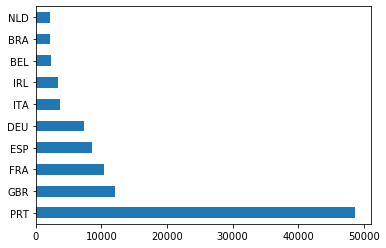

In [120]:
country_df_count = df['country'].value_counts()
country_df_count.nlargest(10).plot.barh()
plt.show()

In [121]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
ATF        1
BWA        1
NIC        1
LCA        1
UMI        1
Name: country, Length: 177, dtype: int64

##### Deposit type

In [83]:
Deposit_ori = clean_data['deposit_type'] 
Deposit_LE = df_LE['deposit_type'] 
  
ori_Deposit_series = pd.Series(Deposit_ori) 
LE_Deposit_series = pd.Series(Deposit_LE) 
  
frames_deposit = { 'Deposit Type Ori': ori_Deposit_series, 'Deposit Type LE': LE_Deposit_series } 
  
Deposit_df = pd.DataFrame(frames_deposit) 
  
Deposit_df.drop_duplicates(subset = 'Deposit Type Ori', inplace = True)

In [84]:
Deposit_df

,Deposit Type Ori,Deposit Type LE
2,No Deposit,0
1559,Refundable,2
2133,Non Refund,1


##### Lead time

In [79]:
clean_data['lead_time']

2           7
3          13
4          14
5          14
6           0
         ... 
119385     23
119386    102
119387     34
119388    109
119389    205
Name: lead_time, Length: 116957, dtype: int64

##### Total of special request

In [86]:
clean_data['total_of_special_requests'].unique()

array([0, 1, 3, 2, 4, 5], dtype=int64)

##### Adr

In [88]:
clean_data['adr']

2          75.00
3          75.00
4          98.00
5          98.00
6         107.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 116957, dtype: float64

##### Market segment

In [89]:
MarketSeg_ori = clean_data['market_segment'] 
MarketSeg_LE = df_LE['market_segment'] 
  
ori_MarketSeg_series = pd.Series(MarketSeg_ori) 
LE_MarketSeg_series = pd.Series(MarketSeg_LE) 
  
frames_MarketSeg = { 'Market Segment Ori': ori_MarketSeg_series, 'Market Segment LE': LE_MarketSeg_series } 
  
MarketSeg_df = pd.DataFrame(frames_MarketSeg) 
  
MarketSeg_df.drop_duplicates(subset = 'Market Segment Ori', inplace = True)

In [92]:
MarketSeg_df.sort_values(by = ['Market Segment LE'])

,Market Segment Ori,Market Segment LE
49013,Aviation,0
4455,Complementary,1
3,Corporate,2
2,Direct,3
413,Groups,4
9,Offline TA/TO,5
4,Online TA,6


##### Arrival date day of month

In [94]:
clean_data['arrival_date_day_of_month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

##### Arrival date week number

In [103]:
date_week_num = clean_data['arrival_date_week_number'].unique()
date_week_num.sort()

In [111]:
clean_data['arrival_date_week_number'].unique()

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26], dtype=int64)

In [104]:
print(date_week_num)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53]


##### Stays in week nights

In [107]:
stay_week_night = clean_data['stays_in_week_nights'].unique()
stay_week_night.sort()

In [110]:
clean_data['stays_in_week_nights'].unique()

array([ 1,  2,  3,  4,  5, 11,  8, 10,  6,  7, 15,  0,  9, 12, 20, 14, 16,
       21, 13, 30, 19, 24, 40, 22, 25, 17, 32, 26, 18, 41], dtype=int64)

In [108]:
print(stay_week_night)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24
 25 26 30 32 40 41]


### New Robust Scaler Based on Feature Importance

In [140]:
std_cln_data = clean_data_scal[['country', 
                                'deposit_type', 
                                'lead_time', 
                                'total_of_special_requests', 
                                'adr', 
                                'market_segment', 
                                'arrival_date_day_of_month', 
                                'arrival_date_week_number', 
                                'stays_in_week_nights']]

In [136]:
robust_new = RobustScaler()
robust_new.fit(std_cln_data)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [139]:
joblib.dump(robust_new, 'RobScalerHotelnew')

['RobScalerHotelnew']